# Fandango Movie Rating 

Fandango is an online movie rating aggregator which gives a movie rating from 0 to 5-star. It seems promising, however, in october 2015, Walt Hickey, a data journalist found a discrepancy from the actual rating and the rating diplaied on website. To be more specific, the HTML of the page shows the actual ratings were been rounded up to the nereast half-star for the webpage to display. More detial about the article can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Here I'd like to investigate the Fandango rating and see if improvement had been make after Hickey's report (2016-2017).


## Read the data 



In [1]:
import pandas as pd
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [2]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [4]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(10)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [5]:
fandango_after.head(10)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


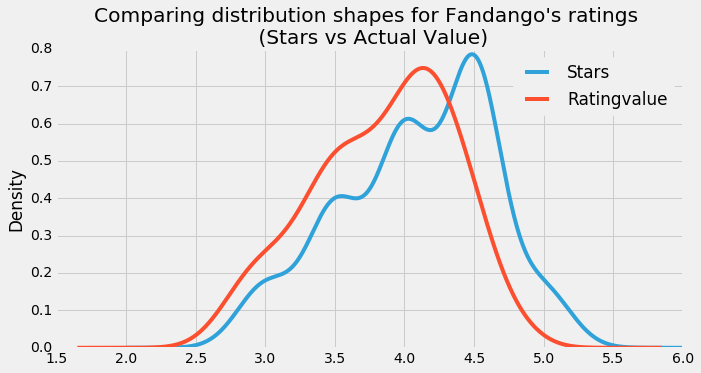

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
fandango_previous['Fandango_Stars'].plot.kde(label = 'Stars')
fandango_previous['Fandango_Ratingvalue'].plot.kde(label = 'Ratingvalue')
plt.legend()
plt.title("Comparing distribution shapes for Fandango's ratings \n (Stars vs Actual Value)")

As shown in the kde plot above, the stars display on webpage distributed at highier range comparing to the actual rating values in 2015. This shows a bias caused by the round-up display.

Next, I am cleaning and extracting the rating data after the article came out. So can get mre insight into if they have make changes.

In [19]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [41]:
# extracting year from movie name
fandango_previous['year'] = fandango_previous['FILM'].str.extract(r'\(([0-9]{4})\)')
fandango_previous['year'].head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: object

In [42]:
fandango_previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

From the value counts above, we can see that most move in "fandango_previous" are 2015 and movies from "fandango_after" are mostly 2016. Therefore, we can  compare the rating distribution of movies in 2015 vs 2016 and see if improvement has been made.

Here I made an copy of movies in 2016 and 2015 to avoid changes in the original data also isolate the movies in each year.



In [43]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [44]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

## Comparing Distribution for 2015 and 2016 Rating

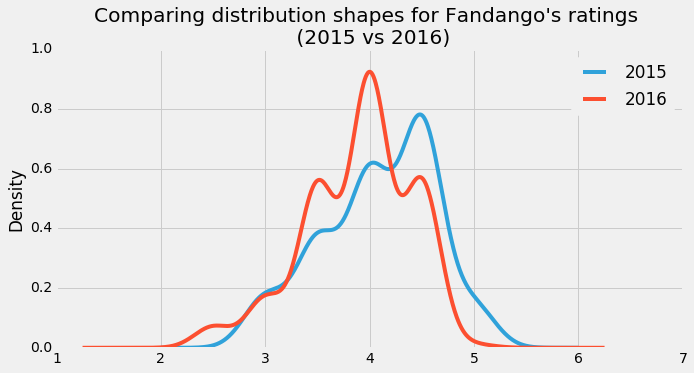

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10,5))
fandango_2015['Fandango_Stars'].plot.kde(label = '2015')
fandango_2016['fandango'].plot.kde(label = '2016')
plt.legend()
plt.title("Comparing distribution shapes for Fandango's ratings \n (2015 vs 2016)")

## Conclusion
By looking at the kde plot for 2015 and 2016 rating, we can see that the rating distribution in 2016 shift twards left compare to 2015. This shift is similar to the comparision between actual rating and stars in 2015. This shift can be adjustment that Fandango made to display more acturate rating to users. 

However, there are many factors may impact the rating distribution. thus, we cannot certain that this shift was mainly due to the system improvement made by Fandango. More  